# Surprise Housing : Advanced Regression
### author : Jesal P.

## Problem Statement
* A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
* The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
* The company wants to know:
    * Which variables are significant in predicting the price of a house, and
    * How well those variables describe the price of a house.

# Importing Required Libraries

In [1]:
# importing required libraries and setting defaults for environment
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',250)
pd.set_option('display.max_rows',300)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Importing libraries and modules for regression model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
scalar = MinMaxScaler()
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

* ## User Defined Functions

In [3]:
#some user defined functions


def get_corr(data,cut_off,fig_x,fig_y):

    if cut_off == 0:
        plt.figure(figsize = (fig_x,fig_y))
        sns.heatmap(round(data.corr(),2), annot = True, cmap="coolwarm")
        plt.show()
    else:
        plt.figure(figsize = (fig_x,fig_y))
        sns.heatmap(round(data.corr()>cut_off,2), annot = True, cmap="coolwarm")
        plt.show()


# Step:0 Data Import

In [4]:
# Reading the data
housing = pd.read_csv("train.csv",na_values="Nan")
house_cpy = housing.copy()
print("housing dataframe size = ",housing.shape)
house_cpy.head()

housing dataframe size =  (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#  Step:1 Data Cleaning and EDA

 * ### Exploring Dataset Statistics 

In [5]:
house_cpy.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
house_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 * ### Calculating Missing Values columnwise

In [7]:
# calculating the null percentage of each column
cols = round(100* (house_cpy.isnull().sum()/house_cpy.shape[0]),2)
col =[] 
col_val=[]
for i in range(len(cols)):
    if cols[i]>0:
        col.append(cols.index[i])
        col_val.append(cols[i])
list(sorted(zip(col,col_val),key = lambda t: t[1]))


[('Electrical', 0.07),
 ('MasVnrType', 0.55),
 ('MasVnrArea', 0.55),
 ('BsmtQual', 2.53),
 ('BsmtCond', 2.53),
 ('BsmtFinType1', 2.53),
 ('BsmtExposure', 2.6),
 ('BsmtFinType2', 2.6),
 ('GarageType', 5.55),
 ('GarageYrBlt', 5.55),
 ('GarageFinish', 5.55),
 ('GarageQual', 5.55),
 ('GarageCond', 5.55),
 ('LotFrontage', 17.74),
 ('FireplaceQu', 47.26),
 ('Fence', 80.75),
 ('Alley', 93.77),
 ('MiscFeature', 96.3),
 ('PoolQC', 99.52)]

In [8]:
# Listing columns having more than 50% of NA data
null_cols=[]
set_null_percent = 50
for col in range(len(cols)):
    if cols[col]>= set_null_percent:
        null_cols.append(cols.index[col])
null_cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [9]:
# Dropping columns with >50% null values
house_cpy = house_cpy.drop(columns = null_cols)

# Dropping column ID as it is of no use for model building
house_cpy = house_cpy.drop(columns = ['Id'])
house_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [10]:
# calculating the null percentage of each column
cols = round(100* (house_cpy.isnull().sum()/house_cpy.shape[0]),2)
col =[] 
col_val=[]
for i in range(len(cols)):
    if cols[i]>0:
        col.append(cols.index[i])
        col_val.append(cols[i])
list(sorted(zip(col,col_val),key = lambda t: t[1]))

[('Electrical', 0.07),
 ('MasVnrType', 0.55),
 ('MasVnrArea', 0.55),
 ('BsmtQual', 2.53),
 ('BsmtCond', 2.53),
 ('BsmtFinType1', 2.53),
 ('BsmtExposure', 2.6),
 ('BsmtFinType2', 2.6),
 ('GarageType', 5.55),
 ('GarageYrBlt', 5.55),
 ('GarageFinish', 5.55),
 ('GarageQual', 5.55),
 ('GarageCond', 5.55),
 ('LotFrontage', 17.74),
 ('FireplaceQu', 47.26)]

* ### Conditioning the Data
    * ### Check Categorical levels with reference from Data Dictionary
    * ### For categorical columns : impute meaningfull NA with value
    * ### For Continuous columns : impute missing values with mean/median


In [11]:
column = list(house_cpy.columns)
column_multi_lev = []
cat_levels = [2,20]
for var in range(len(house_cpy.columns)):
    if ((house_cpy[column[var]].nunique()<= cat_levels[1]) & (house_cpy[column[var]].nunique()> cat_levels[0])):
        print("\n ",column[var],house_cpy[column[var]].unique(),house_cpy[column[var]].nunique())
        column_multi_lev.append(column[var])



  MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] 15

  MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH'] 5

  LotShape ['Reg' 'IR1' 'IR2' 'IR3'] 4

  LandContour ['Lvl' 'Bnk' 'Low' 'HLS'] 4

  LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'] 5

  LandSlope ['Gtl' 'Mod' 'Sev'] 3

  Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe'] 9

  Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe'] 8

  BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs'] 5

  HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin'] 8

  OverallQual [ 7  6  8  5  9  4 10  3  1  2] 10

  OverallCond [5 8 6 7 4 2 3 9 1] 9

  RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed'] 6

  RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile'] 8

  Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImSt

In [12]:
column = list(house_cpy.columns)
column_bin = []
cat_levels = [0,2]
for var in range(len(house_cpy.columns)):
    if ((house_cpy[column[var]].nunique()<= cat_levels[1]) & (house_cpy[column[var]].nunique()> cat_levels[0])):
        print("\n ",column[var],house_cpy[column[var]].unique(),house_cpy[column[var]].nunique())
        column_bin.append(column[var])



  Street ['Pave' 'Grvl'] 2

  Utilities ['AllPub' 'NoSeWa'] 2

  CentralAir ['Y' 'N'] 2


* ####  There is a spelling correction in Exterior2nd: `Wd Shng` instead of `Wd Sdng`

In [13]:
house_cpy['Exterior2nd'] = house_cpy['Exterior2nd'].apply(lambda x:"Wd Sdng" if x=="Wd Shng" else x)
house_cpy['Exterior2nd'].unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'CmentBd',
       'BrkFace', 'Stucco', 'AsbShng', 'Brk Cmn', 'ImStucc', 'AsphShn',
       'Stone', 'Other', 'CBlock'], dtype=object)

In [14]:
house_cpy['MSSubClass'] = house_cpy.astype('object')
cat_cols = list(house_cpy.select_dtypes(include = ['object']))
num_cols = list(house_cpy.select_dtypes(include = ['int64','float64']))
print("categorical_columns = ",cat_cols,len(cat_cols))
print("\nnumerical_columns = ",num_cols, len(num_cols))

categorical_columns =  ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 40

numerical_columns =  ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'E

* #### Handling the skweness of the target variable

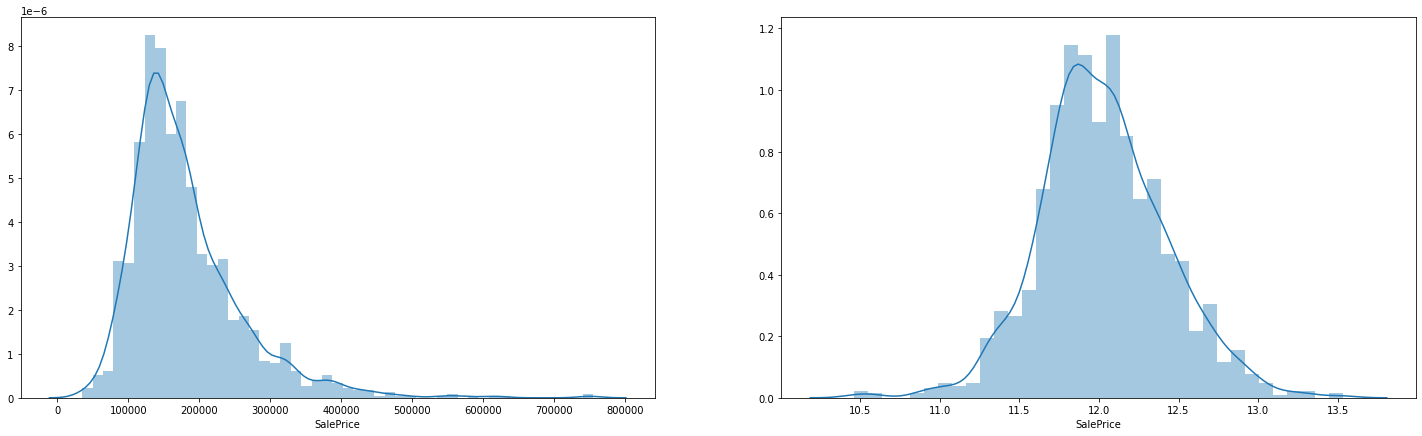

In [15]:
# Visualizing the target column and transforming it
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.distplot(house_cpy['SalePrice'])

plt.subplot(1,2,2)
#  Norbmalizing the target variable
house_cpy['SalePrice'] = np.log(house_cpy['SalePrice'])
sns.distplot(house_cpy['SalePrice'])


#### Imputing None to meaningfull NA for categorical columns

In [16]:
# Handling categorical variables with meaningful NA
house_cpy[cat_cols] = house_cpy[cat_cols].fillna("None")

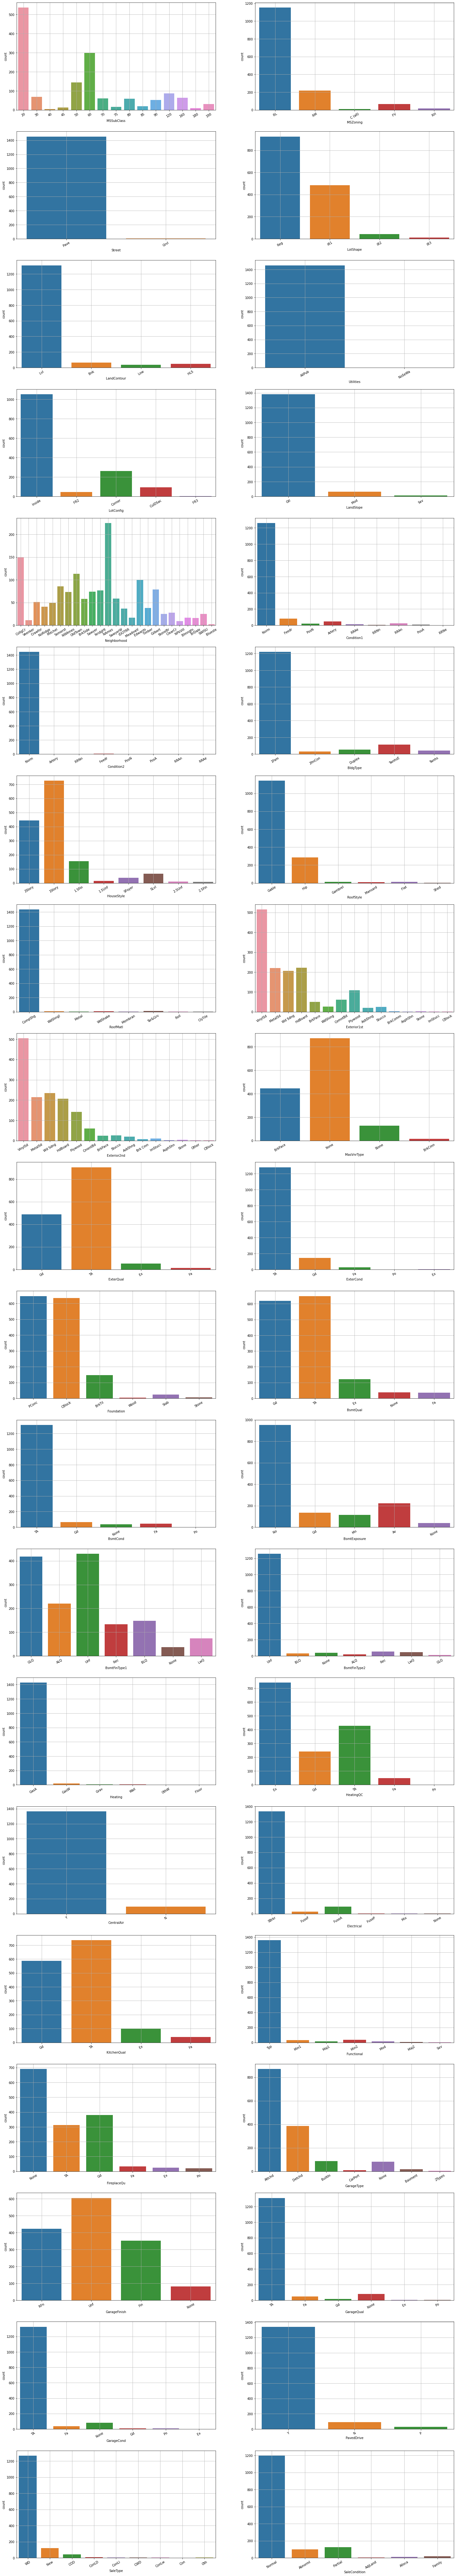

In [17]:
plt.figure(figsize=(25,150))
for var in range(len(cat_cols)):
    plt.subplot(20,2,var+1)
    sns.countplot(house_cpy[cat_cols[var]])
    plt.xticks(rotation=30)
    plt.grid(1)

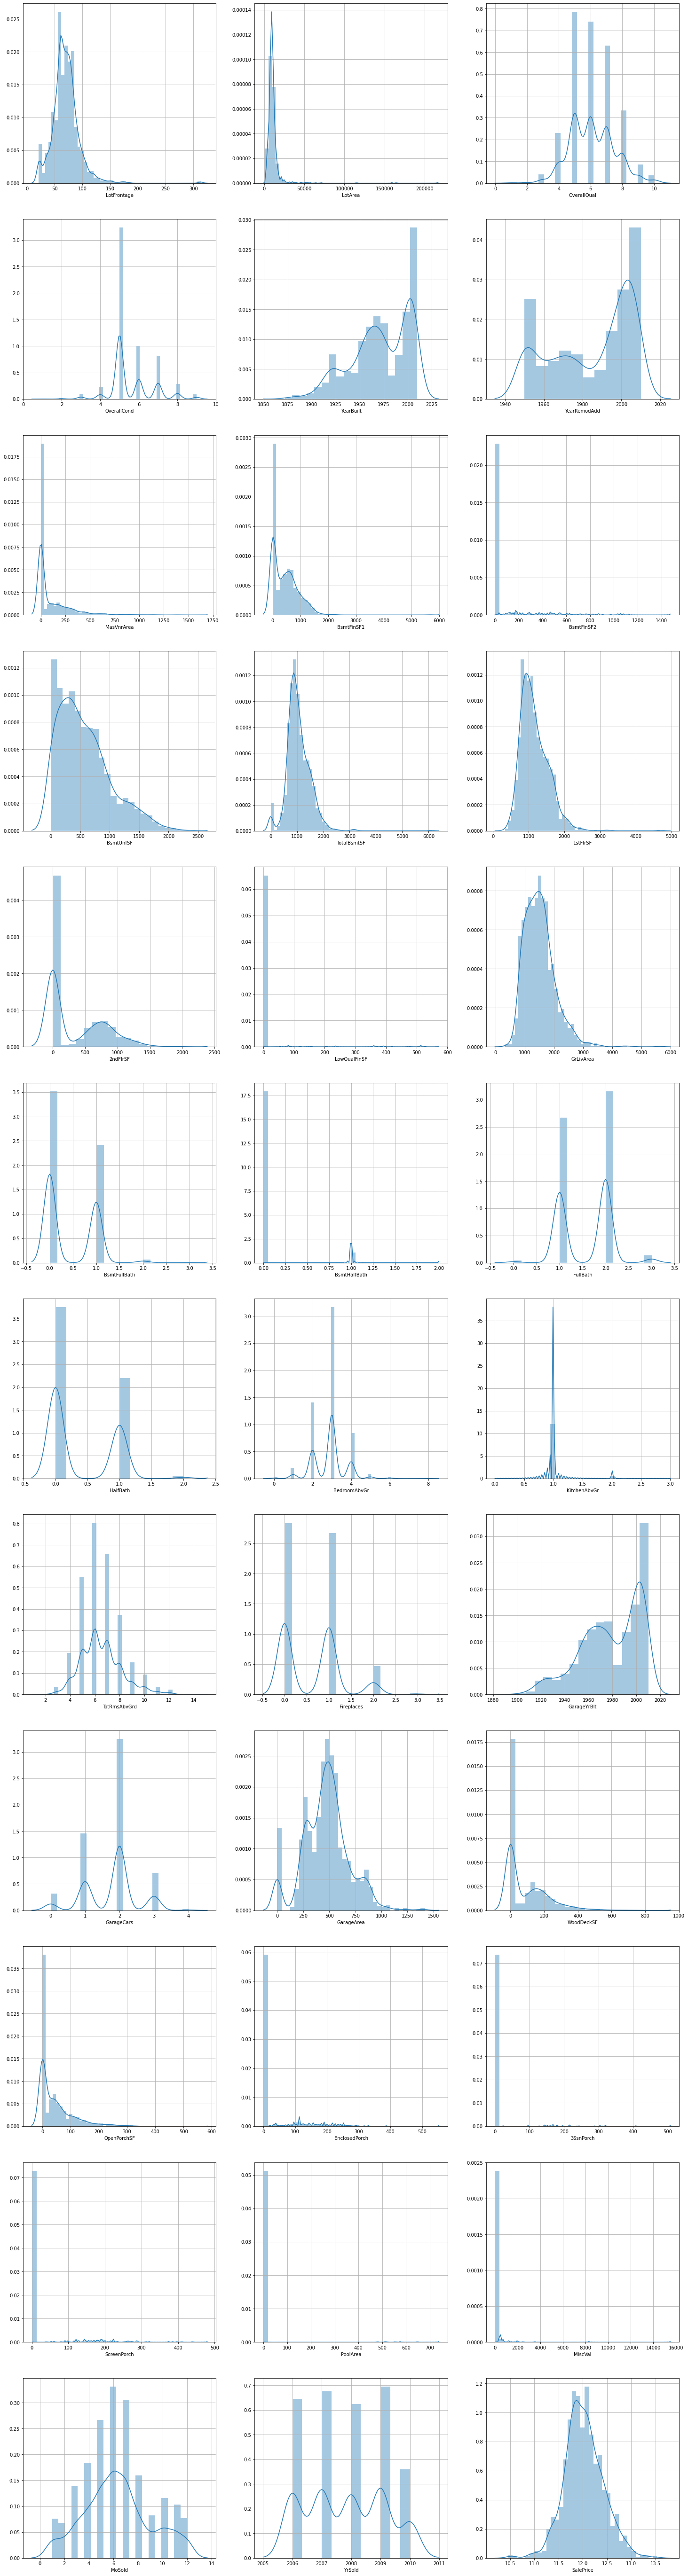

In [18]:
plt.figure(figsize=(25,100))
for var in range(len(num_cols)):
    plt.subplot(12,3,var+1)
    sns.distplot(house_cpy[num_cols[var]])
    plt.grid(1)

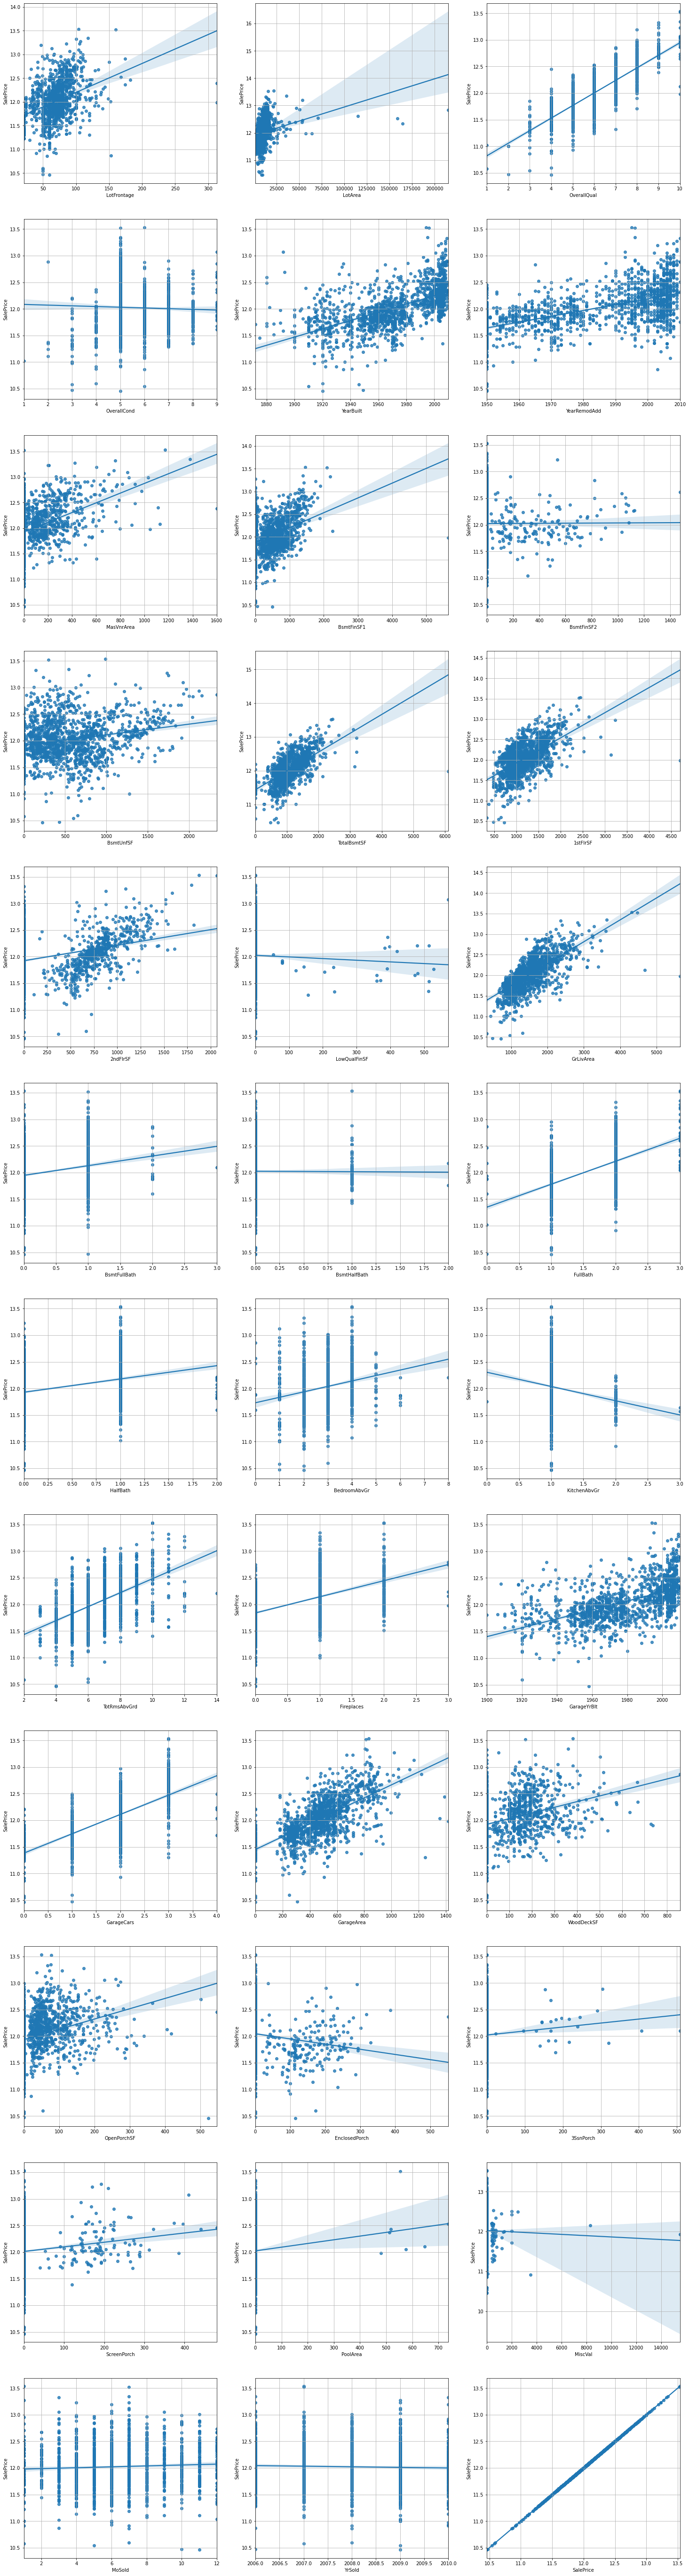

In [19]:
plt.figure(figsize=(25,100))
for var in range(len(num_cols)):
    plt.subplot(12,3,var+1)
    sns.regplot(house_cpy[num_cols[var]],house_cpy['SalePrice'])
    plt.grid(1)


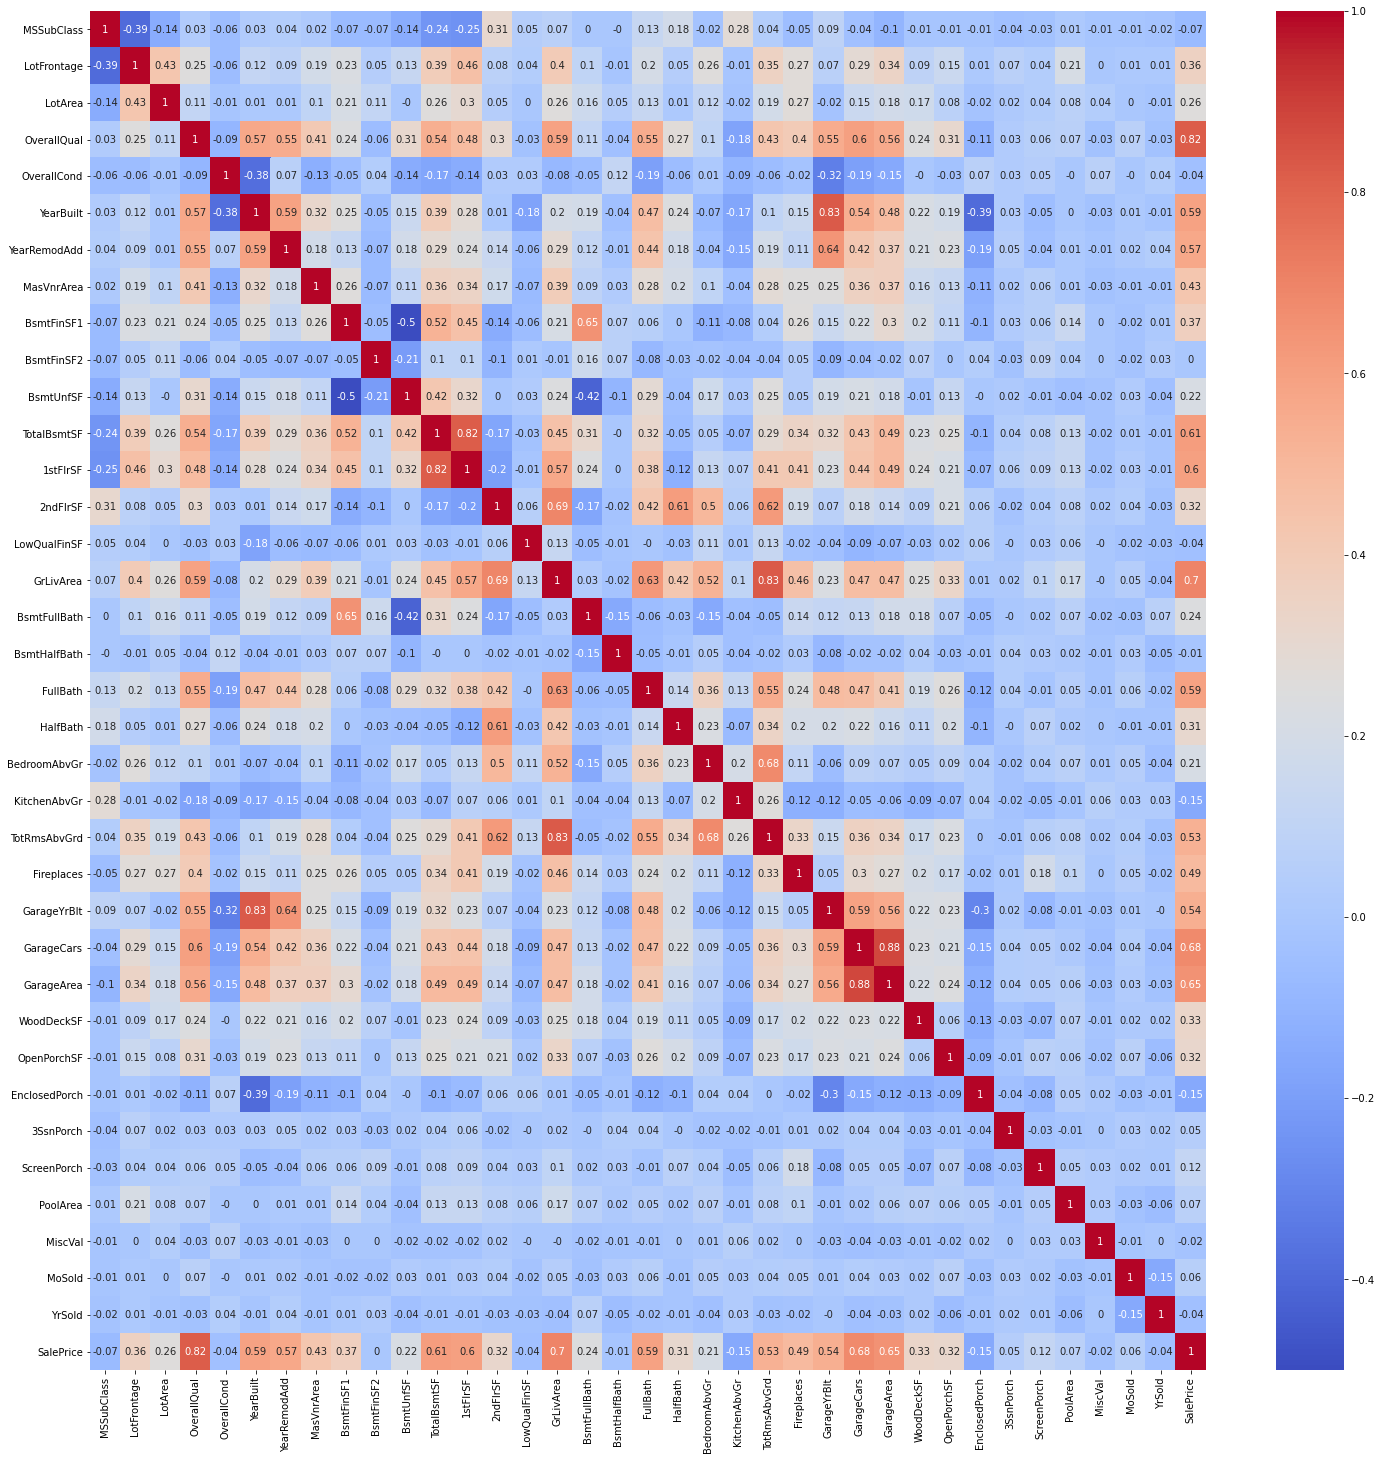

In [20]:
get_corr(house_cpy,0,25,25)

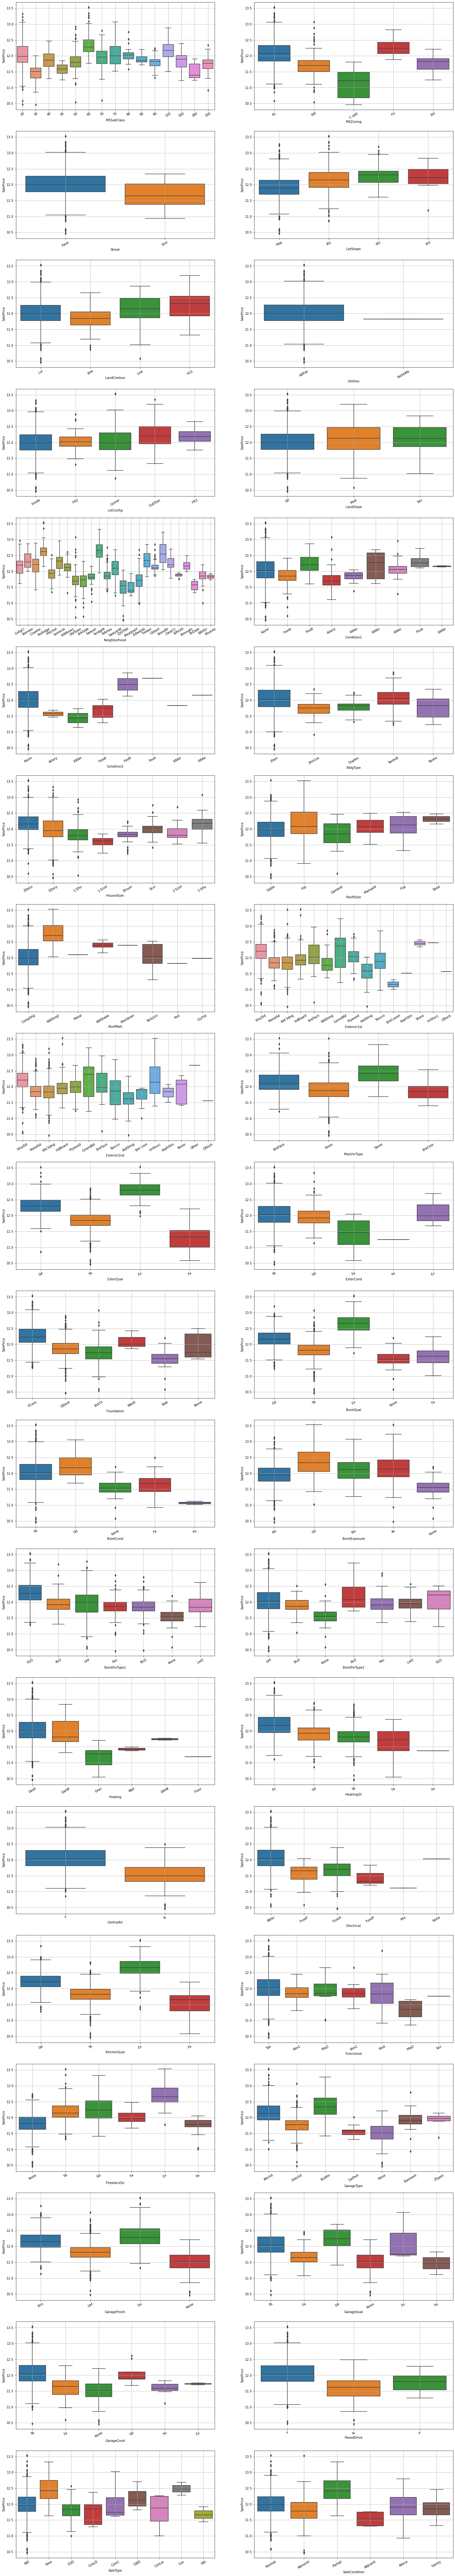

In [21]:
plt.figure(figsize=(25,150))
for var in range(len(cat_cols)):
    plt.subplot(20,2,var+1)
    sns.boxplot(data = house_cpy,x=house_cpy[cat_cols[var]],y= house_cpy['SalePrice'])
    plt.xticks(rotation=30)
    plt.grid(1)

In [22]:
# calculating the null percentage of each column
cols = round(100* (house_cpy.isnull().sum()/house_cpy.shape[0]),2)
col =[] 
col_val=[]
for i in range(len(cols)):
    if cols[i]>0:
        col.append(cols.index[i])
        col_val.append(cols[i])
list(sorted(zip(col,col_val),key = lambda t: t[1]))

[('MasVnrArea', 0.55), ('GarageYrBlt', 5.55), ('LotFrontage', 17.74)]

#### Handling the three numerical columns with null values

(872, 76)
Percentage of MasVnrType -> None =   59.73


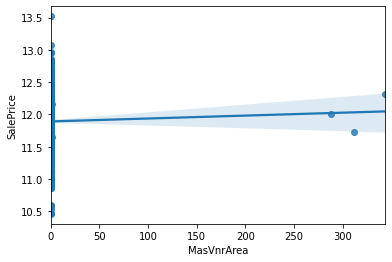

In [23]:
# Visualizing the scatter plot for MasVnrType 0 and Saleprice
Mas_Vnr_none = house_cpy.loc[house_cpy['MasVnrType']=="None"]
sns.regplot(Mas_Vnr_none['MasVnrArea'],Mas_Vnr_none['SalePrice'])
house_cpy['MasVnrArea'] = house_cpy['MasVnrArea'].fillna(0)
print(Mas_Vnr_none.shape)
print("Percentage of MasVnrType -> None =  ",round(100*(Mas_Vnr_none.shape[0]/house_cpy.shape[0]),2))

(81, 76)
Percentage of GarageType -> None =   5.55


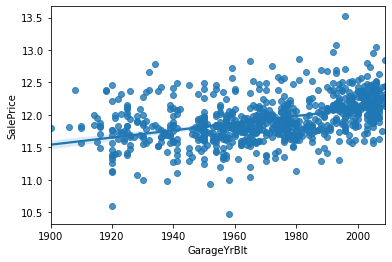

In [24]:
# Getting details of Garage year based on Garage type = NA
no_garage = house_cpy.loc[house_cpy['GarageType']=="None"]
sns.regplot(Mas_Vnr_none['GarageYrBlt'],Mas_Vnr_none['SalePrice'])
house_cpy["GarageYrBlt"] = house_cpy.groupby("GarageType")["GarageYrBlt"].transform(lambda x: x.fillna(0))
print(no_garage.shape)
print("Percentage of GarageType -> None =  ",round(100*(no_garage.shape[0]/house_cpy.shape[0]),2))

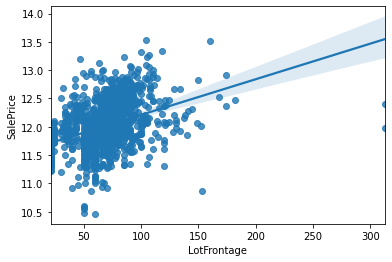

In [25]:
# LotFrontage is correlated to the 'Neighborhood' feature because the LotFrontage for nearby houses will be really similar, so we fill in missing values by the median based off of Neighborhood
house_cpy["LotFrontage"] = house_cpy.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
sns.regplot(house_cpy['LotFrontage'],house_cpy['SalePrice'])

In [26]:
# calculating the null percentage of each column
cols = round(100* (house_cpy.isnull().sum()/house_cpy.shape[0]),2)
col =[] 
col_val=[]
for i in range(len(cols)):
    if cols[i]>0:
        col.append(cols.index[i])
        col_val.append(cols[i])
list(sorted(zip(col,col_val),key = lambda t: t[1]))

[]

### 0 Null values remaining in the dataset

# Step:2 Data Preparation

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


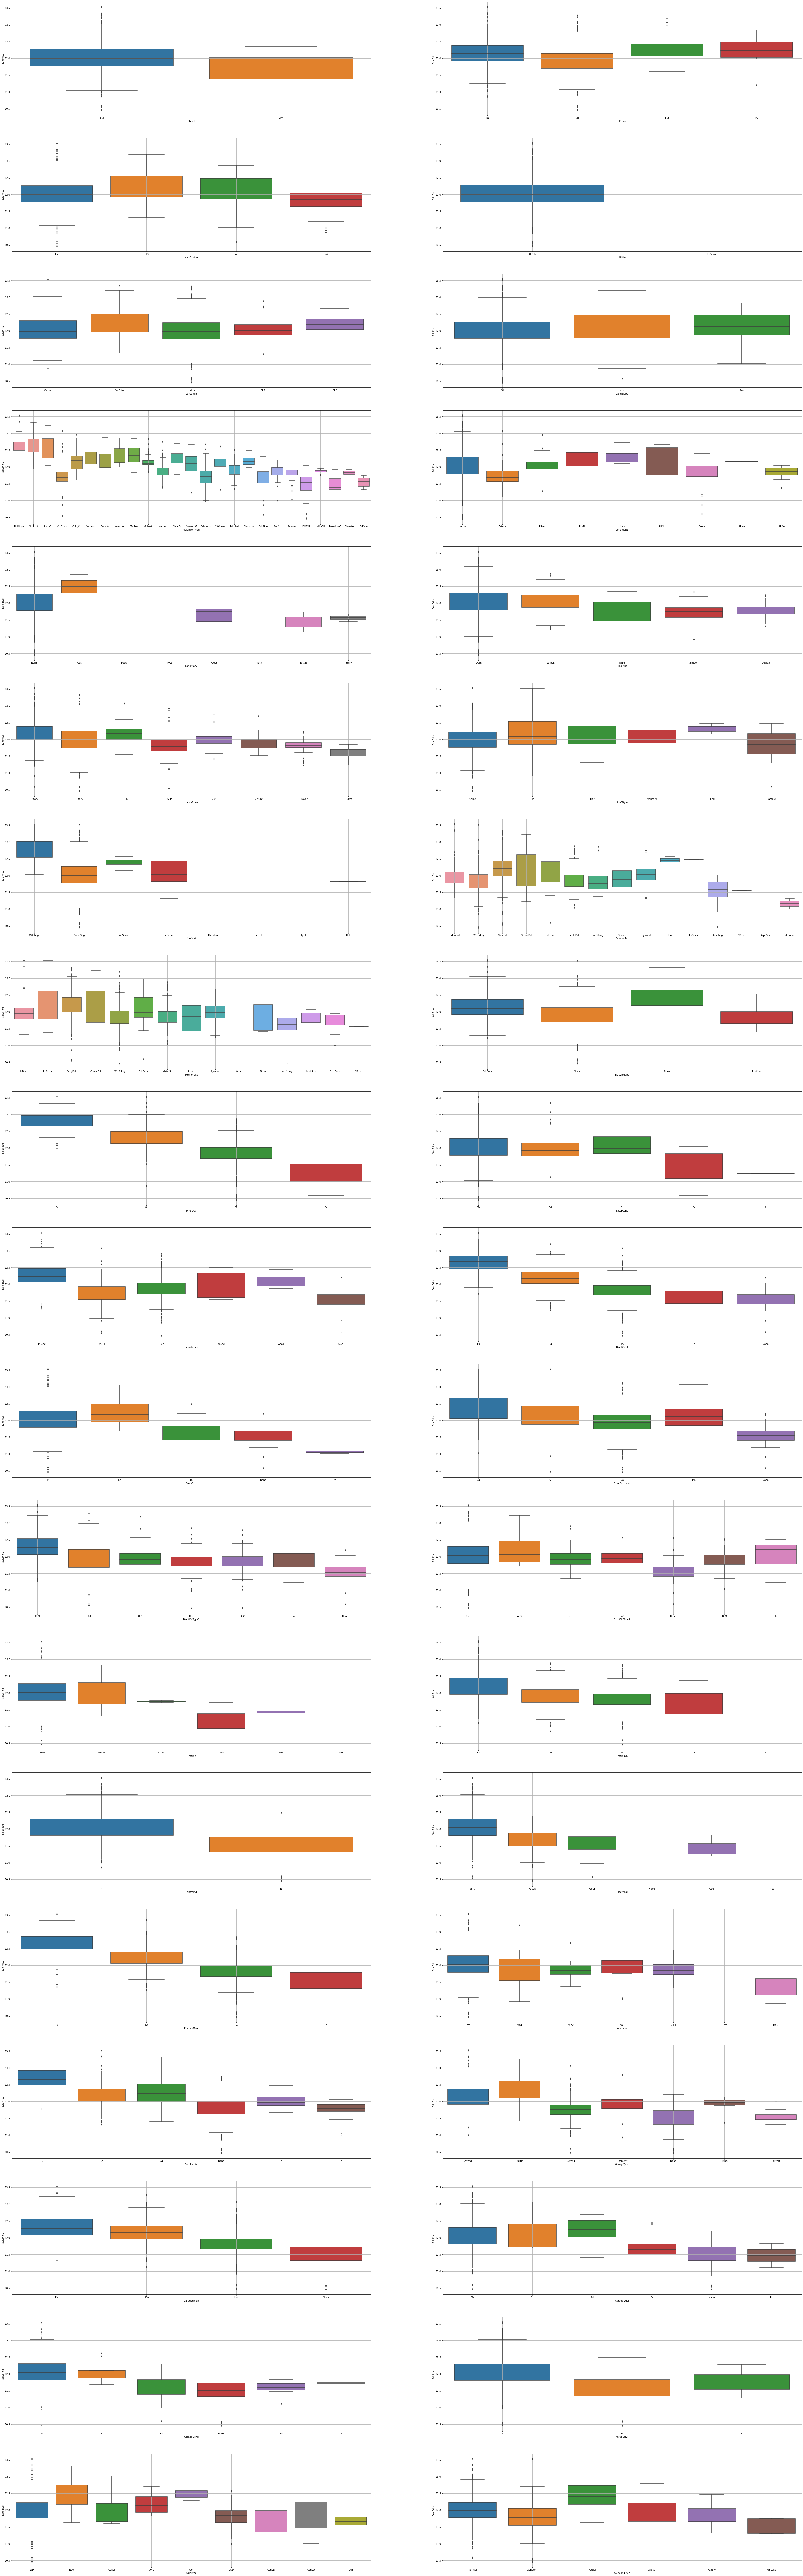

In [27]:
# # Visualising the categorical variables
cat_update_cols = house_cpy.select_dtypes('object').columns
print(cat_update_cols)
plt.figure(figsize=(60, 200))
for i in range(1,len(cat_update_cols)):
    plt.subplot(19,2,i)
    house_cpy = house_cpy.sort_values(by='SalePrice',ascending=False)
    sns.boxplot(x = cat_update_cols[i], y = 'SalePrice', data = house_cpy)
    plt.grid(1)
plt.show()

### Feature Engineering

In [28]:
y = house_cpy['SalePrice']

### Engineering Basement Related variables



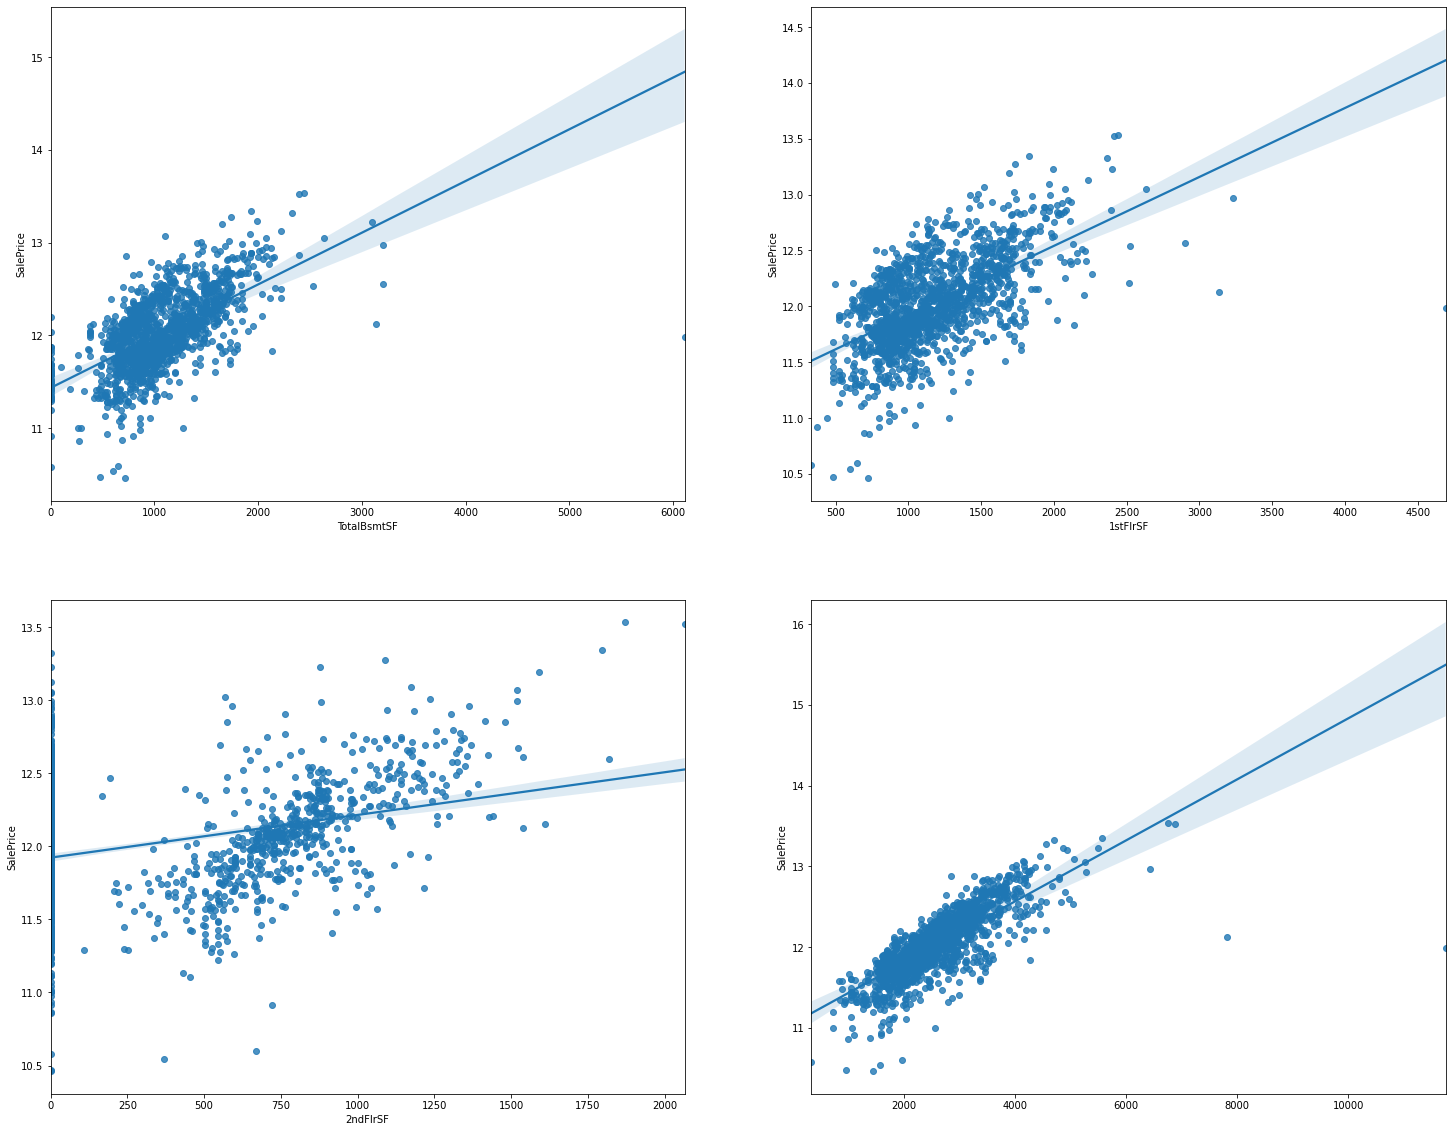

In [29]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.regplot(house_cpy['TotalBsmtSF'], y)
plt.subplot(2,2,2)
sns.regplot(house_cpy['1stFlrSF'], y)
plt.subplot(2,2,3)
sns.regplot(house_cpy['2ndFlrSF'],y)
plt.subplot(2,2,4)
sns.regplot(house_cpy['TotalBsmtSF'] + house_cpy['2ndFlrSF']+house_cpy['1stFlrSF'], y)

In [30]:
house_cpy['Total_SF'] = house_cpy['TotalBsmtSF'] + house_cpy['2ndFlrSF']+house_cpy['1stFlrSF']
house_cpy.shape

(1460, 77)

### Engineering Bath Related variables

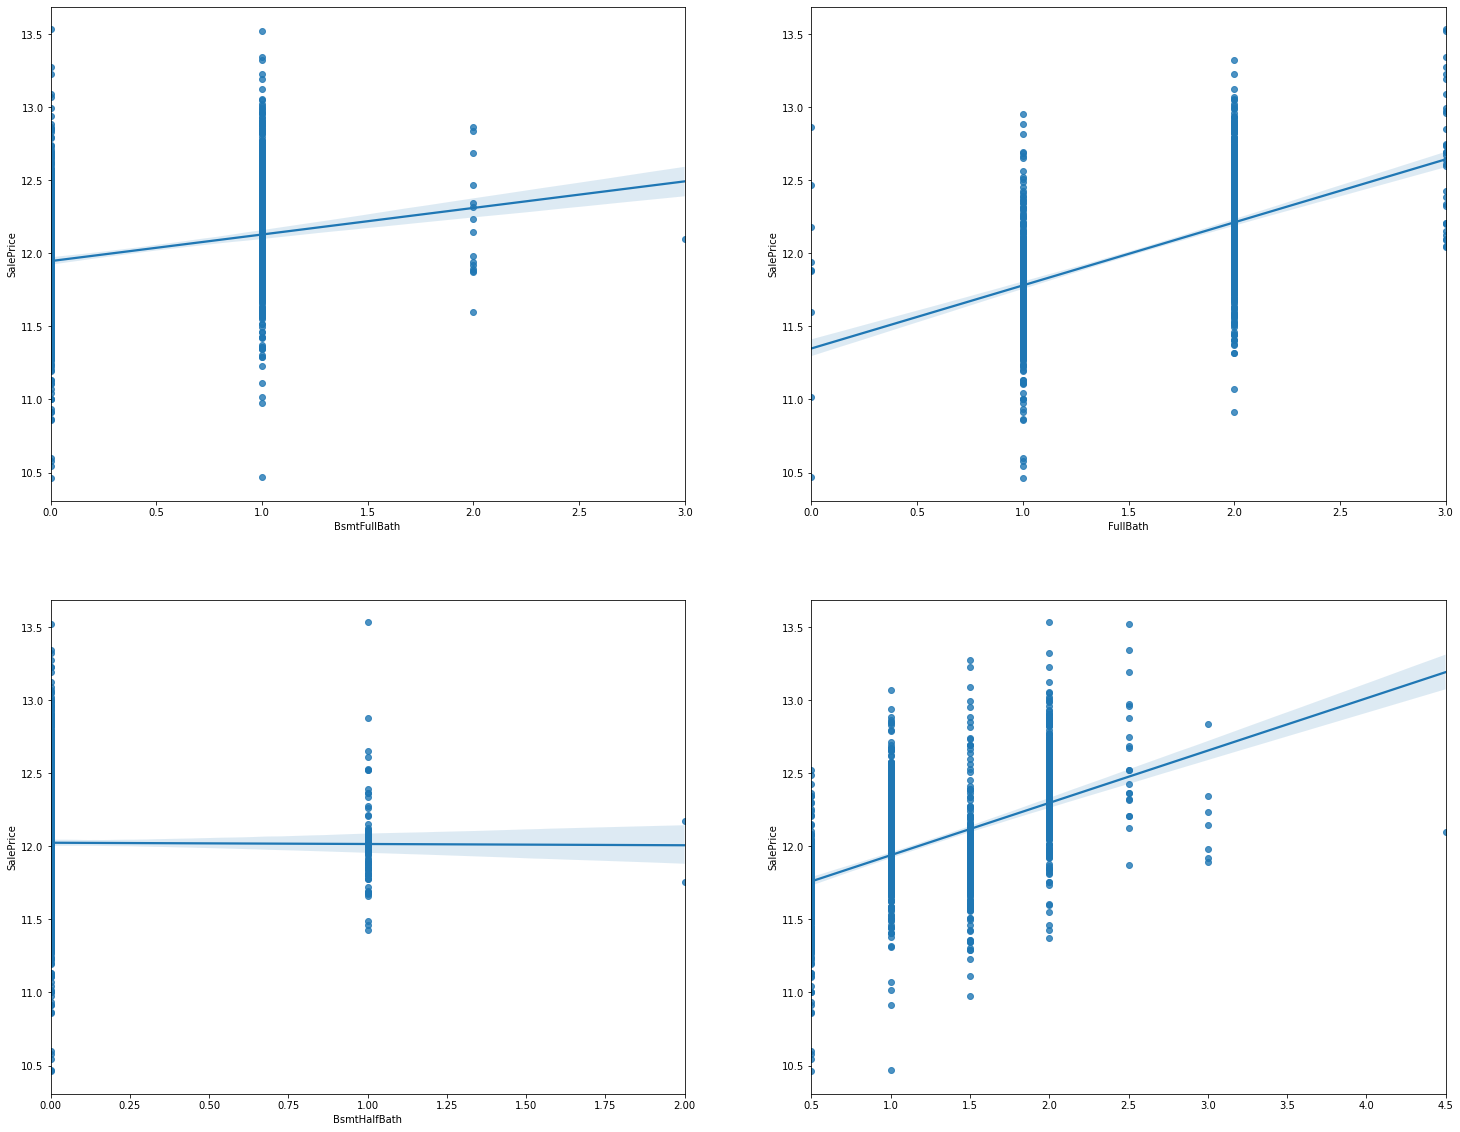

In [31]:
plt.figure(figsize=(25,20))
plt.subplot(2,2,1)
sns.regplot(house_cpy['BsmtFullBath'], y)
plt.subplot(2,2,2)
sns.regplot(house_cpy['FullBath'], y)
plt.subplot(2,2,3)
sns.regplot(house_cpy['BsmtHalfBath'],y)
plt.subplot(2,2,4)
sns.regplot(house_cpy['BsmtFullBath'] + (0.5*house_cpy['BsmtHalfBath'])+(0.5*house_cpy['FullBath']), y)

In [32]:
house_cpy['Total_Basement'] = house_cpy['BsmtFullBath'] + house_cpy['BsmtHalfBath']+house_cpy['FullBath']
house_cpy.shape

(1460, 78)

### Engineering Porch Related variables

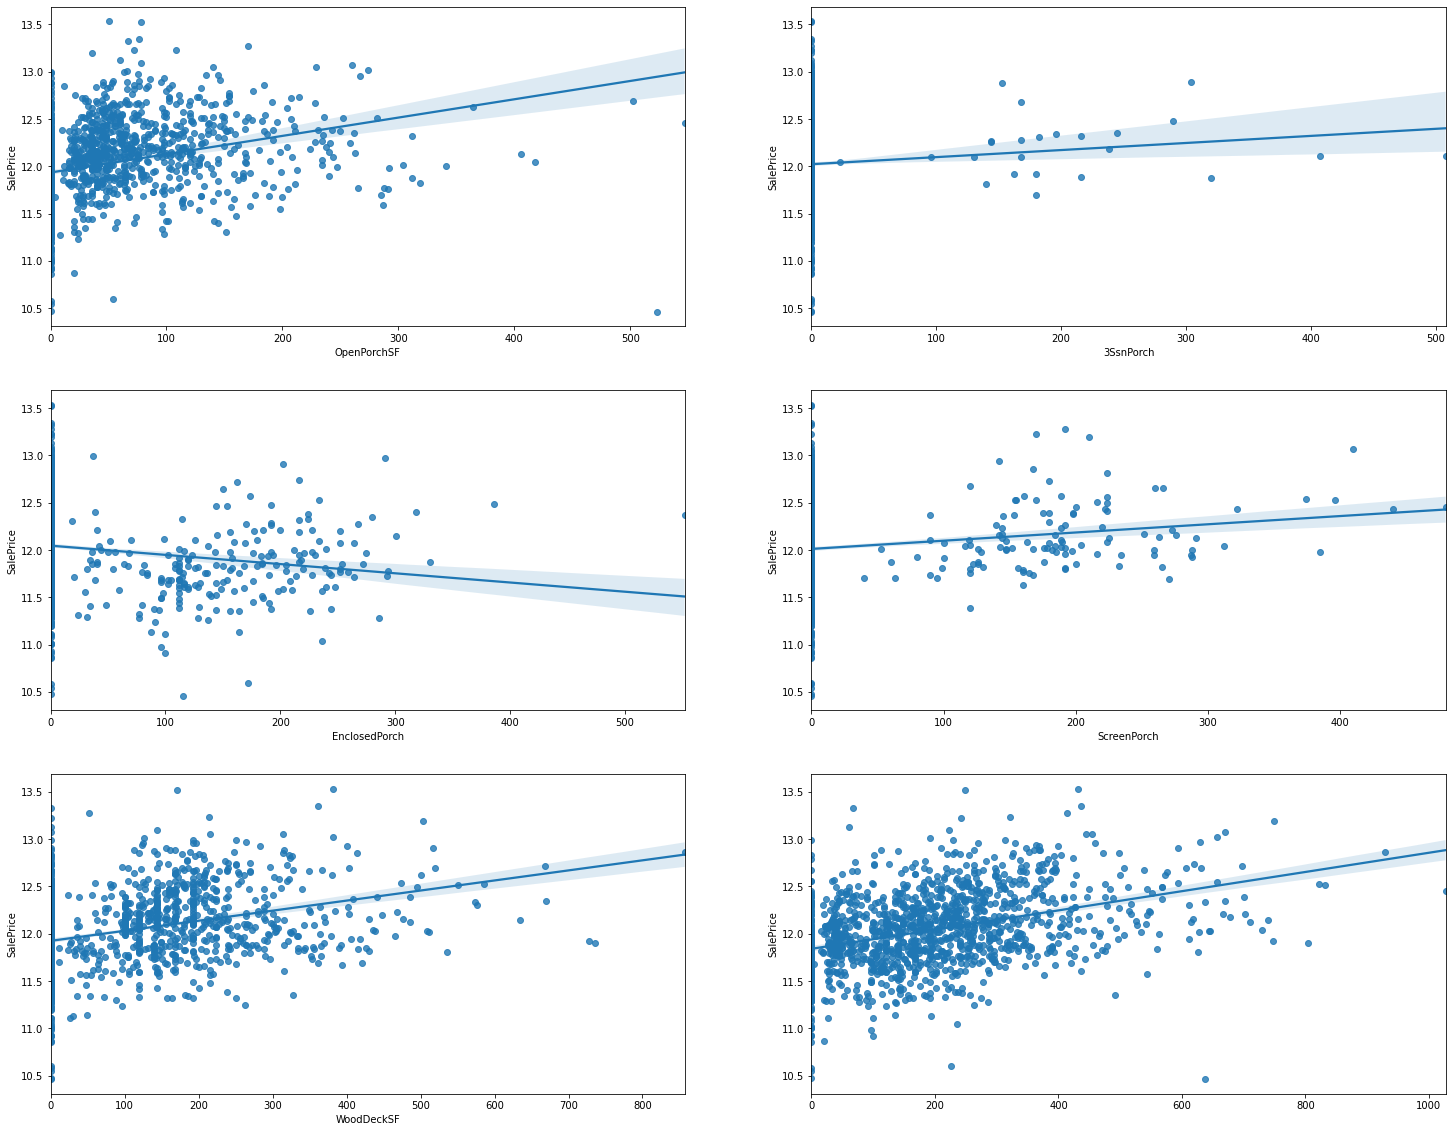

In [33]:
plt.figure(figsize=(25,20))
plt.subplot(3,2,1)
sns.regplot(house_cpy['OpenPorchSF'], y)
plt.subplot(3,2,2)
sns.regplot(house_cpy['3SsnPorch'], y)
plt.subplot(3,2,3)
sns.regplot(house_cpy['EnclosedPorch'],y)
plt.subplot(3,2,4)
sns.regplot(house_cpy['ScreenPorch'], y)
plt.subplot(3,2,5)
sns.regplot(house_cpy['WoodDeckSF'],y)
plt.subplot(3,2,6)
sns.regplot(house_cpy['OpenPorchSF'] + house_cpy['3SsnPorch']+house_cpy['EnclosedPorch']+house_cpy['ScreenPorch']+house_cpy['WoodDeckSF'], y)

In [34]:
house_cpy['Porch_SF'] = house_cpy['OpenPorchSF'] + house_cpy['3SsnPorch']+house_cpy['EnclosedPorch']+house_cpy['ScreenPorch']+house_cpy['WoodDeckSF']
house_cpy.shape

(1460, 79)

### Categorical Variable Encoding

In [35]:
# Getting 2-level categorical variables
column = list(house_cpy.columns)
column_binary =[]
cat_levels = 2
for var in range(len(house_cpy.columns)):
    if house_cpy[column[var]].nunique()<=cat_levels:
        print("\n ",column[var],house_cpy[column[var]].unique(),house_cpy[column[var]].nunique())
        column_binary.append(column[var])


  Street ['Pave' 'Grvl'] 2

  Utilities ['AllPub' 'NoSeWa'] 2

  CentralAir ['Y' 'N'] 2


In [36]:
# Applying binary encoding to these variables
for var in range(len(column_binary)):
    house_cpy[column_binary[var]] = house_cpy[column_binary[var]].apply(lambda x : 1 if x== (house_cpy[column_binary[var]].unique()[0]) else 0)
house_cpy[column_binary].head()

Street  Utilities  CentralAir
691        1          1           1
1182       1          1           1
1169       1          1           1
898        1          1           1
803        1          1           1

In [37]:
dummy_enc_cols = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition']

# convert into dummies
house_dummy = pd.get_dummies(house_cpy[dummy_enc_cols], drop_first=True)
house_dummy.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LandContour_HLS  \
691             0            0            1            0                0   
1182            0            0            1            0                0   
1169            0            0            1            0                0   
898             0            0            1            0                0   
803             0            0            1            0                0   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
691                 0                1                  0              0   
1182                0                1                  0              0   
1169                0                1                  1              0   
898                 0                1                  0              0   
803                 0                1                  0              0   

      LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
691               0                 0                     0   
1182              0                 0                     0   
1169              0                 0                     0   
898               0                 1                     0   
803               0                 1                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
691                     0                     0                     0   
1182                    0                     0                     0   
1169                    0                     0                     0   
898                     0                     0                     0   
803                     0                     0                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
691                      0                     0                     0   
1182                     0                     0                     0   
1169                     0                     0                     0   
898                      0                     0                     0   
803                      0                     0                     0   

      Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
691                      0                    0                     0   
1182                     0                    0                     0   
1169                     0                    0                     0   
898                      0                    0                     0   
803                      0                    0                     0   

      Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
691                      0                   0                     0   
1182                     0                   0                     0   
1169                     0                   0                     0   
898                      0                   0                     0   
803                      0                   0                     0   

      Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
691                     0                     1                     0   
1182                    0                     1                     0   
1169                    0                     1                     0   
898                     0                     0                     1   
803                     0                     0                     1   

      Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
691                      0                   0                    0   
1182                     0                   0                    0   
1169                     0                   0                    0   
898                      0                   0                    0   
803                      0                   0                    0   

      Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
691        

In [38]:
# drop categorical variables 
house_cpy = house_cpy.drop(columns= dummy_enc_cols)

In [39]:
# concat dummy variables with X
house_cpy = pd.concat([house_cpy, house_dummy], axis=1)

### Creating extra features 

In [40]:
house_cpy['2ndfloor'] = house_cpy['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
house_cpy['Basement'] = house_cpy['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
house_cpy['FirePlace'] =house_cpy['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
house_cpy['Pool']=house_cpy['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

### Label Encoding

In [41]:
categorical_col = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in categorical_col:
    label = LabelEncoder() 
    label.fit(list(house_cpy[col].values)) 
    house_cpy[col] = label.transform(list(house_cpy[col].values))

print('Shape all_data: {}'.format(house_cpy.shape))

Shape all_data: (1460, 202)


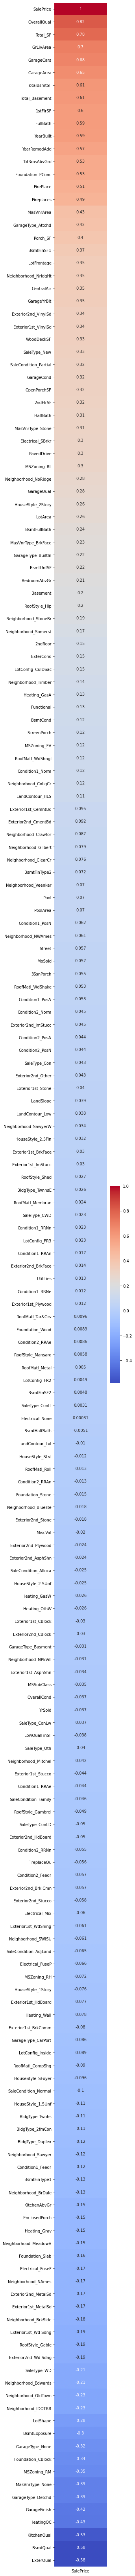

In [42]:
# Visualizing the correlation between sales price and other columns
plt.figure(figsize=(3,120))
sns.heatmap(house_cpy.corr()[['SalePrice']].sort_values('SalePrice',ascending=False),annot=True,cmap='coolwarm')


In [43]:
house_cpy.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.95,0.99])

MSSubClass  LotFrontage        LotArea       Street     LotShape  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean      4.166438    70.199658   10516.828082     0.995890     1.942466   
std       4.161951    22.431902    9981.264932     0.063996     1.409156   
min       0.000000    21.000000    1300.000000     0.000000     0.000000   
10%       0.000000    48.000000    5000.000000     1.000000     0.000000   
20%       0.000000    57.000000    7078.400000     1.000000     0.000000   
30%       0.000000    60.000000    8063.700000     1.000000     0.000000   
40%       1.000000    65.000000    8793.400000     1.000000     3.000000   
50%       4.000000    70.000000    9478.500000     1.000000     3.000000   
60%       5.000000    73.000000   10198.200000     1.000000     3.000000   
70%       5.000000    78.000000   11066.500000     1.000000     3.000000   
80%       8.000000    82.000000   12205.800000     1.000000     3.000000   
95%      12.000000   104.000000   17401.150000     1.000000     3.000000   
99%      14.000000   137.410000   37567.640000     1.000000     3.000000   
max      14.000000   313.000000  215245.000000     1.000000     3.000000   

         Utilities    LandSlope  OverallQual  OverallCond    YearBuilt  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.999315     0.062329     6.099315     4.575342  1971.267808   
std       0.026171     0.276232     1.382997     1.112799    30.202904   
min       0.000000     0.000000     1.000000     0.000000  1872.000000   
10%       1.000000     0.000000     5.000000     4.000000  1924.900000   
20%       1.000000     0.000000     5.000000     4.000000  1947.800000   
30%       1.000000     0.000000     5.000000     4.000000  1958.000000   
40%       1.000000     0.000000     6.000000     4.000000  1965.000000   
50%       1.000000     0.000000     6.000000     4.000000  1973.000000   
60%       1.000000     0.000000     6.000000     4.000000  1984.000000   
70%       1.000000     0.000000     7.000000     5.000000  1997.300000   
80%       1.000000     0.000000     7.000000     6.000000  2003.000000   
95%       1.000000     1.000000     8.000000     7.000000  2007.000000   
99%       1.000000     1.000000    10.000000     8.000000  2009.000000   
max       1.000000     2.000000    10.000000     8.000000  2010.000000   

       YearRemodAdd   MasVnrArea    ExterQual    ExterCond     BsmtQual  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    1984.865753   103.117123     2.539726     3.733562     2.724658   
std       20.645407   180.731373     0.693995     0.731807     1.278630   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
10%     1950.000000     0.000000     2.000000     2.000000     1.000000   
20%     1961.800000     0.000000     2.000000     4.000000     2.000000   
30%     1971.000000     0.000000     2.000000     4.000000     2.000000   
40%     1980.000000     0.000000     3.000000     4.000000     2.000000   
50%     1994.000000     0.000000     3.000000     4.000000     2.000000   
60%     1998.000000    16.000000     3.000000     4.000000     4.000000   
70%     2002.000000   116.000000     3.000000     4.000000     4.000000   
80%     2005.000000   205.200000     3.000000     4.000000     4.000000   
95%     2007.000000   456.000000     3.000000     4.000000     4.000000   
99%     2009.000000   791.280000     3.000000     4.000000     4.000000   
max     2010.000000  1600.000000     3.000000     4.000000     4.000000   

          BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2  \
count  1460.000000   1460.000000   1460.000000  1460.000000   1460.000000   
mean      3.691096      2.310274      3.150000   443.639726      5.586986   
std       0.949616      1.165663      2.251517   456.098091      1.200854   
min       0.000000      0.000000      0.000000     0.000000      0.000000   
10%       2.000000  

# Step:3 Data Preprocessing

### Data Splitting in to train set and test set

In [44]:
y = house_cpy.pop('SalePrice')
X = house_cpy

In [45]:
# train-test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=19)

In [46]:
print("X_train =",X_train.shape)
print("y_train =",y_train.shape)
print("X_test =",X_test.shape)
print("y_test =",y_test.shape)

X_train = (1022, 201)
y_train = (1022,)
X_test = (438, 201)
y_test = (438,)


### Min-max scalar fit_transform on the train data

In [47]:
X_train[X_train.columns] = scalar.fit_transform(X_train[X_train.columns])
X_train.describe()

MSSubClass  LotFrontage      LotArea       Street     LotShape  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      0.289349     0.169906     0.042693     0.996086     0.635029   
std       0.292911     0.075670     0.047632     0.062469     0.472764   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.133562     0.029253     1.000000     0.000000   
50%       0.285714     0.167808     0.037599     1.000000     1.000000   
75%       0.428571     0.202055     0.047761     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         Utilities    LandSlope  OverallQual  OverallCond    YearBuilt  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      0.999022     0.033268     0.571102     0.570939     0.708791   
std       0.031281     0.144670     0.153436     0.138908     0.228887   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       1.000000     0.000000     0.444444     0.500000     0.569231   
50%       1.000000     0.000000     0.555556     0.500000     0.730769   
75%       1.000000     0.000000     0.666667     0.625000     0.930769   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       YearRemodAdd   MasVnrArea    ExterQual    ExterCond     BsmtQual  \
count   1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean       0.589335     0.065227     0.843444     0.934687     0.671967   
std        0.342820     0.112502     0.230109     0.182358     0.318526   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.283333     0.000000     0.666667     1.000000     0.500000   
50%        0.733333     0.000000     1.000000     1.000000     0.500000   
75%        0.900000     0.104219     1.000000     1.000000     1.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

          BsmtCond  BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2  \
count  1022.000000   1022.000000   1022.000000  1022.000000   1022.000000   
mean      0.924902      0.573875      0.528865     0.203756      0.930855   
std       0.232989      0.293243      0.375201     0.201344      0.201211   
min       0.000000      0.000000      0.000000     0.000000      0.000000   
25%       1.000000      0.250000      0.333333     0.000000      1.000000   
50%       1.000000      0.750000      0.333333     0.177788      1.000000   
75%       1.000000      0.750000      1.000000     0.330896      1.000000   
max       1.000000      1.000000      1.000000     1.000000      1.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF    HeatingQC   CentralAir  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      0.041685     0.243253     0.342933     0.384785     0.939335   
std       0.145808     0.193280     0.133098     0.432796     0.238832   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.093322     0.259615     0.000000     1.000000   
50%       0.000000     0.206550     0.325792     0.000000     1.000000   
75%       0.000000     0.345676     0.424693     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1022.000000  1022.000000   1022.000000  1022.000000   1022.000000   
mean      0.325743     0.166694      0.009963     0.286124      0.211840   
std       0.142472     0.210512      0.086570     0.120803      0.255951   
min       0.000000     0.000000      0.000000     0.000000      0.000000   
25%       0.217726     0.000000      0.000000     0.195558      0.000000   
50%       0.297972     0.000000      0.000000     0.274384      0.000000   
75%       0.420339     0.352542      0.000000     0.350435      0.500000   
max       1.000000     1.0000

# Step:4 RFE and Linear Modelling

In [48]:
# Running RFE with the output number of the variable equal to 25
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 121),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('Street', True, 1),
 ('LotShape', False, 145),
 ('Utilities', False, 42),
 ('LandSlope', False, 40),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 25),
 ('MasVnrArea', False, 142),
 ('ExterQual', False, 139),
 ('ExterCond', False, 56),
 ('BsmtQual', False, 35),
 ('BsmtCond', False, 125),
 ('BsmtExposure', False, 53),
 ('BsmtFinType1', False, 143),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 133),
 ('BsmtFinSF2', False, 3),
 ('BsmtUnfSF', False, 2),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 57),
 ('CentralAir', False, 38),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 5),
 ('FullBath', False, 8),
 ('HalfBath', False, 34),
 ('BedroomAbvGr', False, 117),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 47),
 ('TotRmsAbvGrd', Fals

In [50]:
# columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'GarageCars', 'GarageArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Total_SF', 'Porch_SF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_StoneBr', 'Condition1_RRAe', 'Condition2_RRNn',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior1st_Stucco', 'Exterior2nd_CBlock', 'Exterior2nd_Other',
       'Exterior2nd_Stucco', 'Heating_Grav', 'Electrical_None',
       'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth', 'Pool'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotShape', 'Utilities', 'LandSlope', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       ...
       'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', '2ndfloor', 'Basement', 'FirePlace'],
      dtype='object', length=151)

In [52]:
# Dropping duplicates if present in dataset
X_train[col].drop_duplicates(keep='last',inplace=True)
X_train[col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 967 to 265
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LotFrontage           1022 non-null   float64
 1   LotArea               1022 non-null   float64
 2   Street                1022 non-null   float64
 3   OverallQual           1022 non-null   float64
 4   OverallCond           1022 non-null   float64
 5   YearBuilt             1022 non-null   float64
 6   BsmtFinSF1            1022 non-null   float64
 7   TotalBsmtSF           1022 non-null   float64
 8   1stFlrSF              1022 non-null   float64
 9   2ndFlrSF              1022 non-null   float64
 10  LowQualFinSF          1022 non-null   float64
 11  GrLivArea             1022 non-null   float64
 12  BsmtFullBath          1022 non-null   float64
 13  KitchenAbvGr          1022 non-null   float64
 14  GarageCars            1022 non-null   float64
 15  GarageArea          

# Step:5 Ridge Regression

In [53]:
# list of alphas to tune
params_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params_ridge, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [54]:
import sklearn as sk
sorted(sk.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [55]:
# Getting max alpha value 
alphas = max(params_ridge.values())
max_alpha = max(alphas)
max_alpha

10.0

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<= max_alpha]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.008883      0.001064         0.001964        0.000024      0.0001   
1       0.008281      0.000048         0.001942        0.000029       0.001   
2       0.009045      0.001614         0.001968        0.000102        0.01   
3       0.011200      0.004179         0.002395        0.000815        0.05   
4       0.008324      0.000045         0.001956        0.000068         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.096182          -0.091545          -0.092364   
1   {'alpha': 0.001}          -0.096154          -0.091465          -0.091929   
2    {'alpha': 0.01}          -0.095887          -0.090933          -0.090843   
3    {'alpha': 0.05}          -0.095019          -0.089603          -0.090796   
4     {'alpha': 0.1}          -0.094324          -0.088511          -0.090501   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.086523          -0.077820        -0.088887        0.006331   
1          -0.086483          -0.077708        -0.088748        0.006314   
2          -0.086233          -0.077627        -0.088305        0.006151   
3          -0.085743          -0.077093        -0.087651        0.006051   
4          -0.085362          -0.076419        -0.087023        0.006047   

   rank_test_score  split0_train_score  split1_train_score  \
0               23           -0.058869           -0.062672   
1               22           -0.058870           -0.062685   
2               21           -0.058887           -0.062780   
3               20           -0.059045           -0.063010   
4               19           -0.059237           -0.063215   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.061134           -0.061994           -0.063334   
1           -0.061202           -0.061994           -0.063333   
2           -0.061515           -0.062021           -0.063347   
3           -0.061682           -0.062181           -0.063545   
4           -0.061790           -0.062329           -0.063714   

   mean_train_score  std_train_score  
0         -0.061601         0.001548  
1         -0.061617         0.001546  
2         -0.061710         0.001545  
3         -0.061892         0.001563  
4         -0.062057         0.001561

In [57]:
# Best Model's Alpha value
alpha_ridge = cv_results.loc[cv_results['rank_test_score'] ==1]
best_alpha_ridge = 3
print("The optimal value of alpha for ridge is = ",best_alpha_ridge)
alpha_ridge

The optimal value of alpha for ridge is =  3


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
15       0.009226      0.001673          0.00198        0.000059           3   

            params  split0_test_score  split1_test_score  split2_test_score  \
15  {'alpha': 3.0}           -0.08875           -0.08519          -0.088818   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
15          -0.085394          -0.069093        -0.083449        0.007346   

    rank_test_score  split0_train_score  split1_train_score  \
15                1           -0.066003           -0.068623   

    split2_train_score  split3_train_score  split4_train_score  \
15           -0.067187           -0.067727           -0.071065   

    mean_train_score  std_train_score  
15         -0.068121         0.001699

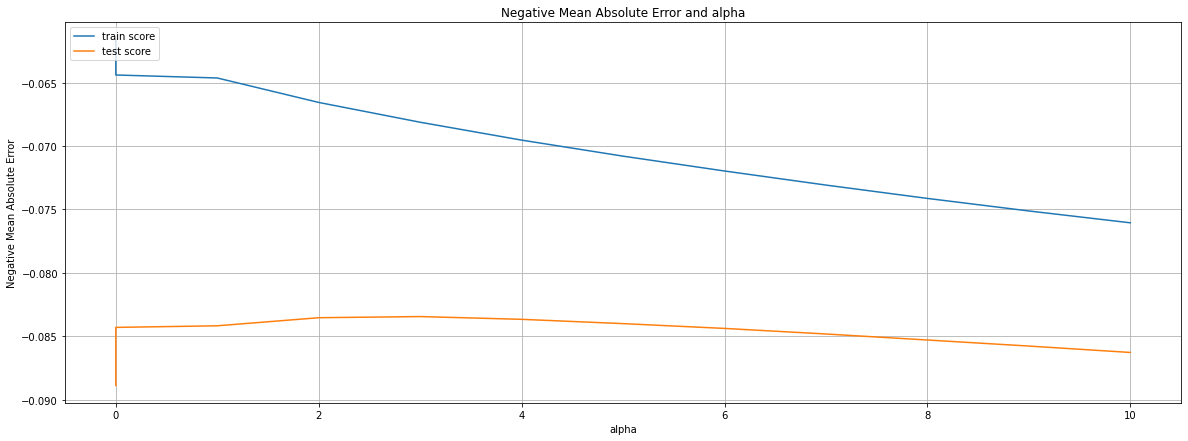

In [58]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20,7))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid(1)
plt.show()

In [59]:
ridge = Ridge(alpha=best_alpha_ridge)

# to check what are the predictor vars after doubling alpha
# ridge = Ridge(alpha=best_alpha_ridge*2)

ridge.fit(X_train, y_train)
model_parameter_coeff = pd.DataFrame({'Variable':X_train.columns,'Coeff':ridge.coef_,'abs_Coeff':abs(ridge.coef_)})
model_parameter_coeff.sort_values(by='abs_Coeff',ascending=False).head(10)

Variable     Coeff  abs_Coeff
7   OverallQual  0.344075   0.344075
25     1stFlrSF  0.262387   0.262387
8   OverallCond  0.251133   0.251133
56     Total_SF  0.235492   0.235492
28    GrLivArea  0.235259   0.235259
22  TotalBsmtSF  0.189634   0.189634
18   BsmtFinSF1  0.186974   0.186974
61  MSZoning_RL  0.144773   0.144773
2       LotArea  0.136546   0.136546
26     2ndFlrSF  0.135671   0.135671

Model r2 score on Train Data =  0.9429519942445576


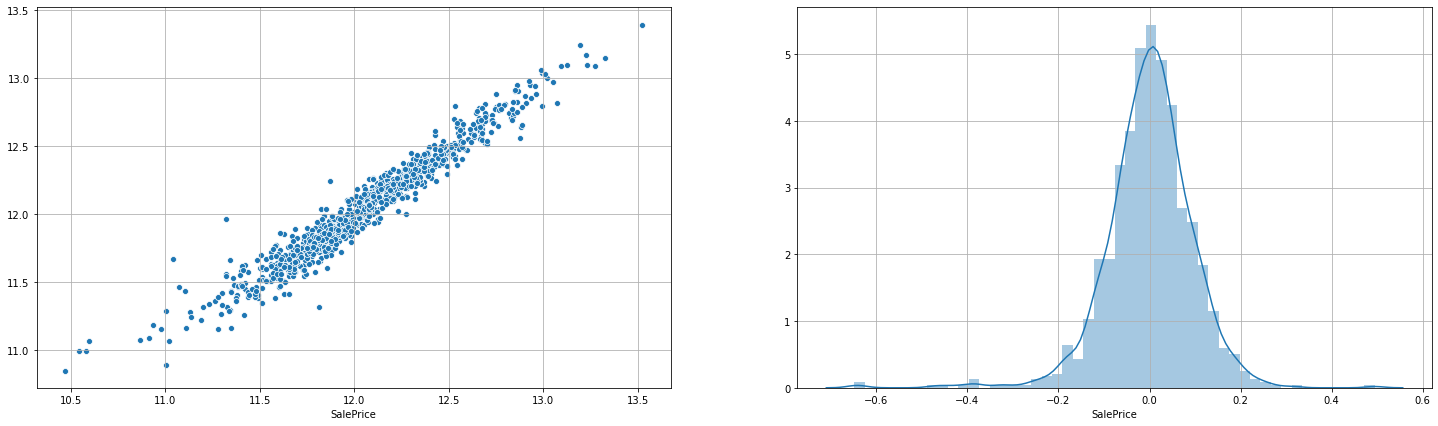

In [60]:
y_train_pred_ridge= ridge.predict(X_train)

print("Model r2 score on Train Data = ",ridge.score(X_train,y_train))

# Visualising the scatter and distribution plot of error terms
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.scatterplot(y_train,y_train_pred_ridge)
plt.grid(1)

plt.subplot(1,2,2)
sns.distplot(y_train-y_train_pred_ridge)
plt.grid(1)

# Step:6 Applying Ridge model on test Data

### Applying the min-max transform on Test data

In [61]:
X_test[X_test.columns] = scalar.transform(X_test[X_test.columns])
# X_test.describe()

Model r2 score on Test Data =  0.7636402428832665


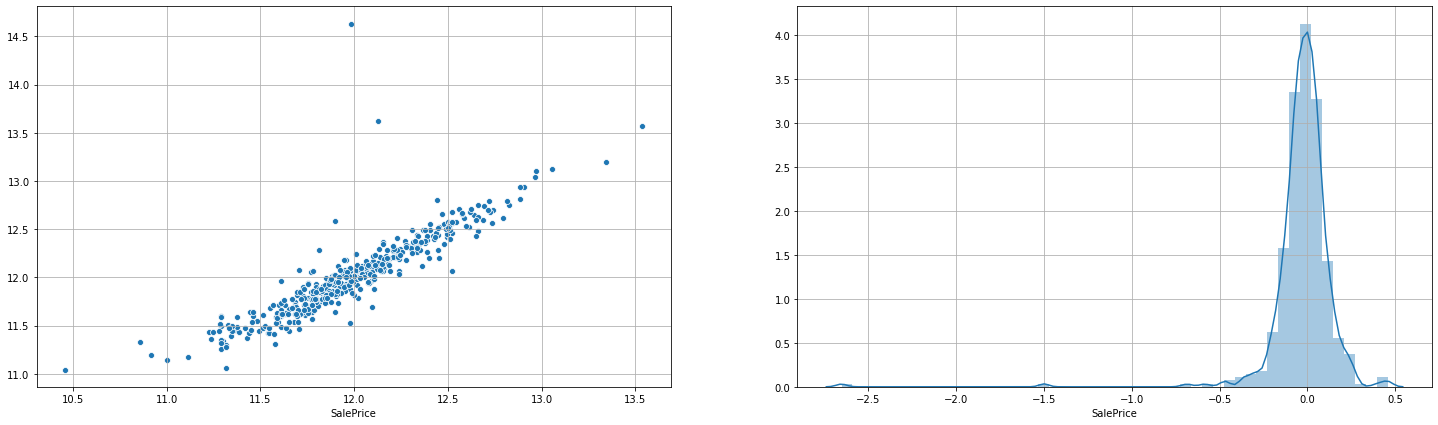

In [62]:
### Running Ridge on Test Data
y_test_pred_ridge= ridge.predict(X_test)

print("Model r2 score on Test Data = ",ridge.score(X_test,y_test))
# Visualising the scatter and distribution plot of error terms
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_test_pred_ridge)
plt.grid(1)

plt.subplot(1,2,2)
sns.distplot(y_test-y_test_pred_ridge)
plt.grid(1)

# Step:7 Lasso Regression

In [72]:
# to check the top 5 after dropping the old top 5 variables
X_train =   X_train.drop(columns = ['Total_SF','GrLivArea','OverallQual','OverallCond','GarageCars'])

In [73]:
params_lasso = {'alpha': [0.001, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 
 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

lasso = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.06, 0.07, 0.08, 0.09,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [74]:
# Getting max alpha value 
alphas = max(params_lasso.values())
max_alpha = max(alphas)
max_alpha

1

In [75]:
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=max_alpha]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.018504      0.007202         0.002041        0.000035       0.001   
1       0.010565      0.003922         0.002012        0.000046        0.01   
2       0.006495      0.000184         0.002056        0.000351        0.05   
3       0.006237      0.000095         0.001865        0.000057        0.06   
4       0.006075      0.000076         0.001830        0.000039        0.07   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.097965          -0.084459          -0.096652   
1   {'alpha': 0.01}          -0.139415          -0.135138          -0.137564   
2   {'alpha': 0.05}          -0.225820          -0.239829          -0.232397   
3   {'alpha': 0.06}          -0.239034          -0.259657          -0.251303   
4   {'alpha': 0.07}          -0.253453          -0.276808          -0.266084   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.097462          -0.081564        -0.091620        0.007101   
1          -0.138917          -0.132871        -0.136781        0.002454   
2          -0.236575          -0.234339        -0.233792        0.004690   
3          -0.248895          -0.249677        -0.249713        0.006574   
4          -0.260466          -0.260936        -0.263549        0.007752   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.081452           -0.083121   
1                2           -0.130827           -0.133207   
2                3           -0.230877           -0.233681   
3                4           -0.246968           -0.251319   
4                5           -0.262674           -0.265227   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.081993           -0.082472           -0.086406   
1           -0.132671           -0.132653           -0.135336   
2           -0.232374           -0.232020           -0.232218   
3           -0.249667           -0.246257           -0.249059   
4           -0.262952           -0.260746           -0.261622   

   mean_train_score  std_train_score  
0         -0.083089         0.001747  
1         -0.132939         0.001444  
2         -0.232234         0.000894  
3         -0.248654         0.001837  
4         -0.262644         0.001511

In [76]:
# Best Model's Alpha value
alpha_lasso = cv_results.loc[cv_results['rank_test_score'] ==1]
best_alpha_lasso = 0.001
print("The optimal value of alpha for lasso is = ",best_alpha_lasso)
alpha_lasso

The optimal value of alpha for lasso is =  0.001


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.018504      0.007202         0.002041        0.000035       0.001   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}          -0.097965          -0.084459          -0.096652   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.097462          -0.081564         -0.09162        0.007101   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.081452           -0.083121   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.081993           -0.082472           -0.086406   

   mean_train_score  std_train_score  
0         -0.083089         0.001747

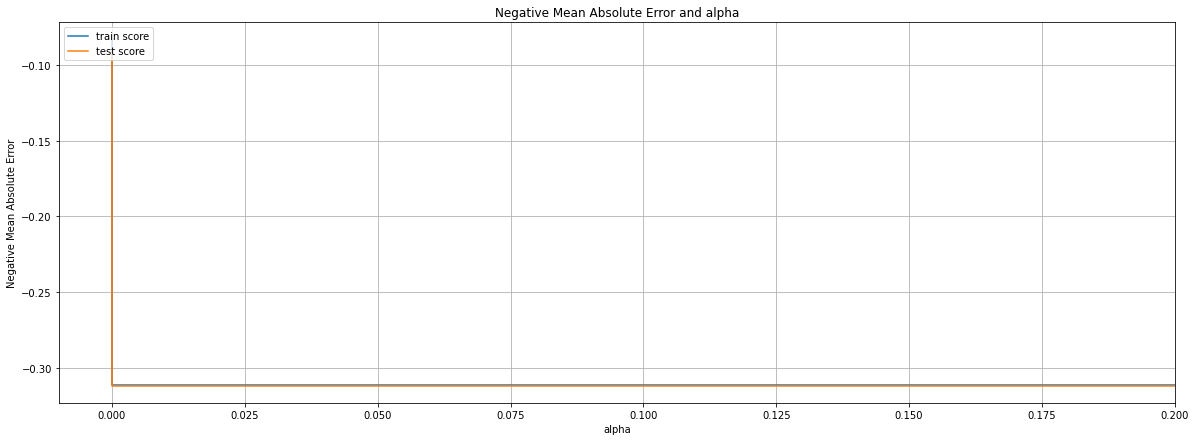

In [77]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(20,7))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlim(-0.01,0.2)
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid(1)
plt.show()

In [78]:
lasso = Lasso(alpha=best_alpha_lasso)
# to check what are the predictor vars after doubling alpha
# lasso = Lasso(alpha=best_alpha_lasso*2)

lasso.fit(X_train, y_train)
model_parameter_coeff = pd.DataFrame({'Variable':X_train.columns,'Coeff':lasso.coef_,'abs_Coeff':abs(lasso.coef_)})
model_parameter_coeff.sort_values(by='abs_Coeff',ascending=False).head(10)

Variable     Coeff  abs_Coeff
23               1stFlrSF  0.762707   0.762707
24               2ndFlrSF  0.522572   0.522572
20            TotalBsmtSF  0.370730   0.370730
39             GarageArea  0.229377   0.229377
34             Functional  0.146694   0.146694
22             CentralAir  0.134554   0.134554
16             BsmtFinSF1  0.131759   0.131759
8            YearRemodAdd  0.111529   0.111529
184          SaleType_New  0.107515   0.107515
70   Neighborhood_Crawfor  0.095724   0.095724

Model r2 score on Train Data =  0.9274274054426711


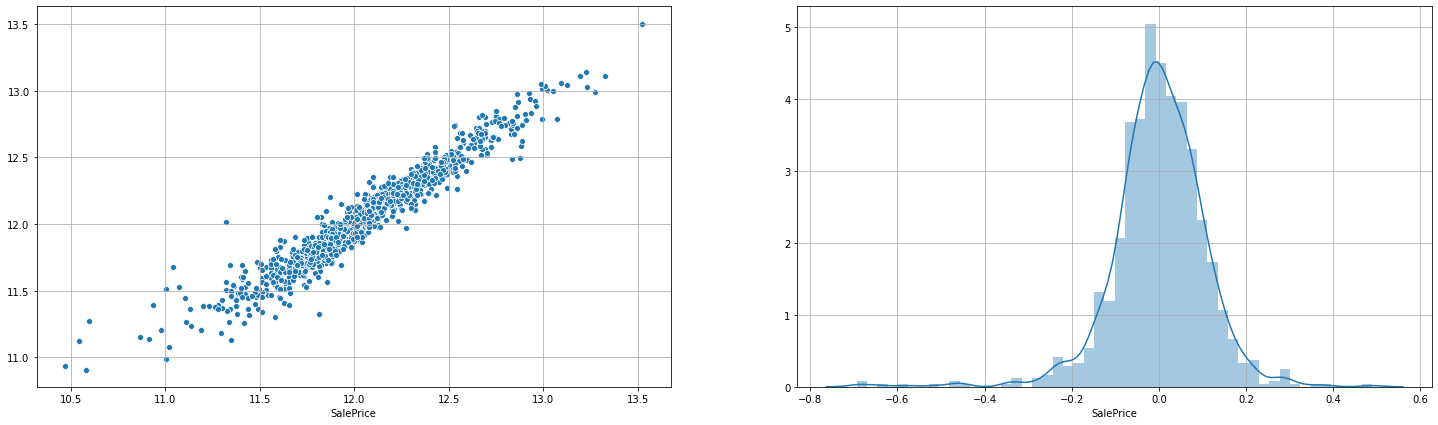

In [69]:
y_train_pred_lasso= lasso.predict(X_train)

print("Model r2 score on Train Data = ",lasso.score(X_train,y_train))

# Visualising the scatter and distribution plot of error terms
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.scatterplot(y_train,y_train_pred_lasso)
plt.grid(1)

plt.subplot(1,2,2)
sns.distplot(y_train-y_train_pred_lasso)
plt.grid(1)

# Step:8 Applying Lasso model on test Data

Model r2 score on Test Data =  0.767533147412728


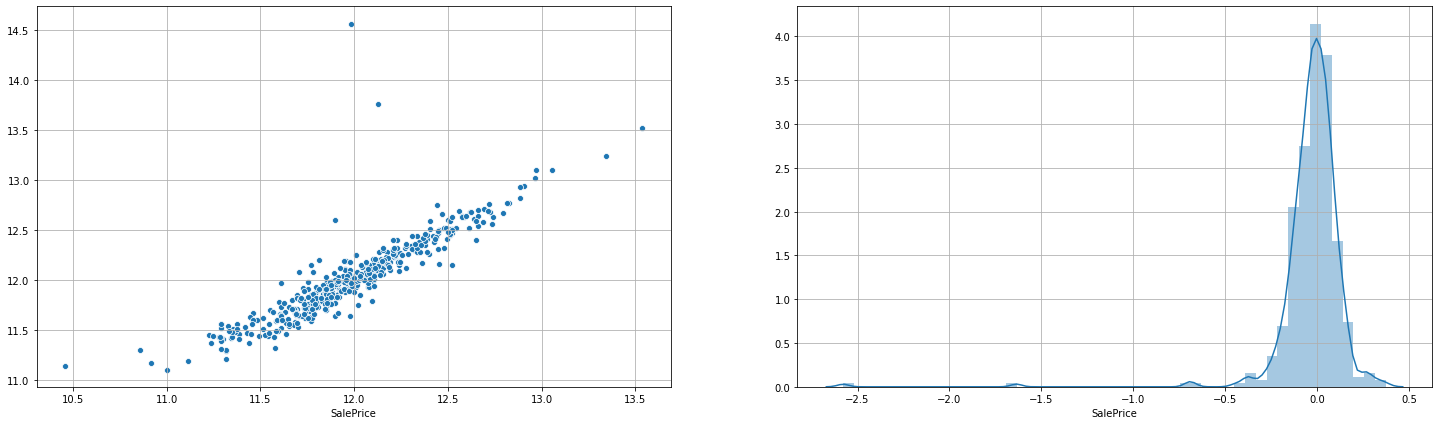

In [70]:
### Running Ridge on Test Data
y_test_pred_lasso= lasso.predict(X_test)

print("Model r2 score on Test Data = ",lasso.score(X_test,y_test))
# Visualising the scatter and distribution plot of error terms
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.scatterplot(y_test,y_test_pred_lasso)
plt.grid(1)

plt.subplot(1,2,2)
sns.distplot(y_test-y_test_pred_lasso)
plt.grid(1)

In [71]:
# # Due to a lot of time consumed while running all the lines. this patch will notify when it reaches the end of notebook running all succesfully
# from google.colab import output
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')